# Clustering Playground

This notebook is meant to facilitate visualizing and playing arround with various clustering algorithms and their hyperparamters.



### My personal opinion on clustering algorithms:


Algorithm | Likely to not be nonsense  | Likely to actually work
---|---|---
k-means	| Not everything  is a sphere	| Great for placing fireman stations, but limited general use
agglomerative  clustering	| It works too often, even when it should not | yes, often, it can be good
dbscan	| Great! When working with very well defined distance metrics in low dimensional space | can do non spherical clusters, that's a big plus
hdbscan	| Yes | Not sure 

In [1]:
# !pip install hdbscan

### Some 2d point cloud data to test our algorithms

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

source = 'https://raw.githubusercontent.com/mkleinbort/resource-datasets/master/blobs/'

flame = pd.read_csv(f'{source}/flame.csv')
agg = pd.read_csv(f'{source}/aggregation.csv')
comp = pd.read_csv(f'{source}/compound.csv')
jain = pd.read_csv(f'{source}/jain.csv')
path = pd.read_csv(f'{source}/pathbased.csv')
r15 = pd.read_csv(f'{source}/r15.csv')
spiral = pd.read_csv(f'{source}/spiral.csv')

datasets = [flame, agg, comp, jain, path, r15, spiral]
dataset_names = ['flame', 'agg', 'comp', 'jain', 'path', 'r15', 'spiral']

### These datasets have a human-annotated "ideal" clustering

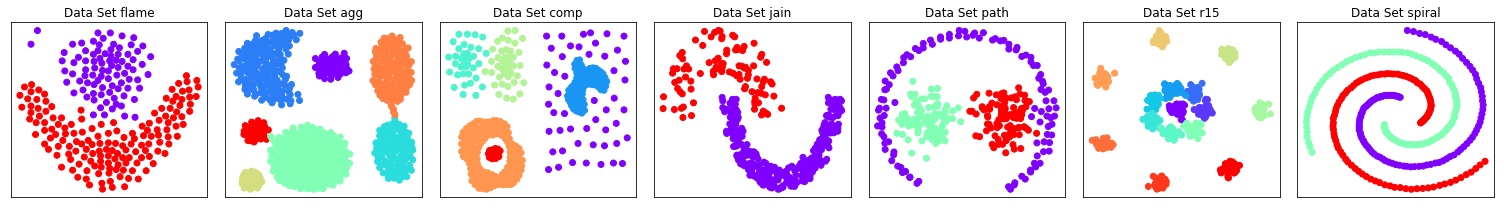

In [3]:
# Plotting the datasets with the subjectively "ideal" labels

def plot_datasets(data_sets, dset_names = dataset_names):
    '''Plots the n datasets in one row'''
    n = len(data_sets)
    plt.figure(figsize=(n*3,3))
    for i, dset in enumerate(data_sets):
        plt.subplot(1, n, i+1)
        plt.scatter(dset['x'],dset['y'], c=dset['label'], cmap='rainbow')
        plt.title('Data Set {}'.format(dset_names[i]))
        plt.xticks([])
        plt.yticks([])
    
    plt.tight_layout()
    plt.show()
    
plot_datasets(datasets)

# Testing clustering algorithms

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from hdbscan import HDBSCAN

The function below is simply a helper, it helps to visualise the output of clustering algorithms.

In [5]:
%config InlineBackend.figure_format = 'retina'

def getplots(algorithms:list, dsets:list, dset_names:list=[]):
    '''
    Visualizer of every algorithm against every dataset
    
    args:
    -----
    algorithms:list
        A list of (clustering) estimators implementing the .fit_predict() method,
        
    datasets:list
        A list of pandas dataframes with columns 'x' and 'y'
    '''
    
    m,n = len(algorithms), len(dsets)
    fig, axes = plt.subplots(nrows=m, ncols=n+2)
    fig.set_figwidth(3*(n+2)) # the +2 is to fit the algorithm name and parameters
    fig.set_figheight(3*m)
    
    # Plot the algorithm names and their parameters:
    for i, alg in enumerate(algorithms):
            
            alg_name = str(alg).split('(')[0]
            alg_params = str(alg.get_params()).strip('{}').replace(', ','\n')
            
            # Plot the name of the algorithm
            axes[i, 0].text(x=0.5, y=0.5, s=alg_name, 
                            va='center', ha='center', 
                            fontsize=18, rotation=45)
            
            # Plot the parameters
            axes[i, -1].text(x=0, y=0.5, s=alg_params, va='center')
            axes[i, -1].axis('off')
                            
    # Plot the outcome of the algorithm on each dataset:
    for i, alg in enumerate(algorithms):
        for j, dset in enumerate(dsets):
            predi = alg.fit_predict(dset)
            axes[i, j+1].scatter(dset['x'],dset['y'], c=predi, cmap='rainbow')
            
        
    # Remove axis ticks 
    for ax in axes.ravel():
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Add titles to the first row:
    axes[0,0].set_title('Algorithm', fontsize=20)
    axes[0,-1].set_title('Parameters', fontsize=20)
    for i, dataset_name in enumerate(dset_names):
        axes[0,i+1].set_title(dataset_name.capitalize(), fontsize=20)

    # Lastly
    plt.tight_layout()

### Example ussage:

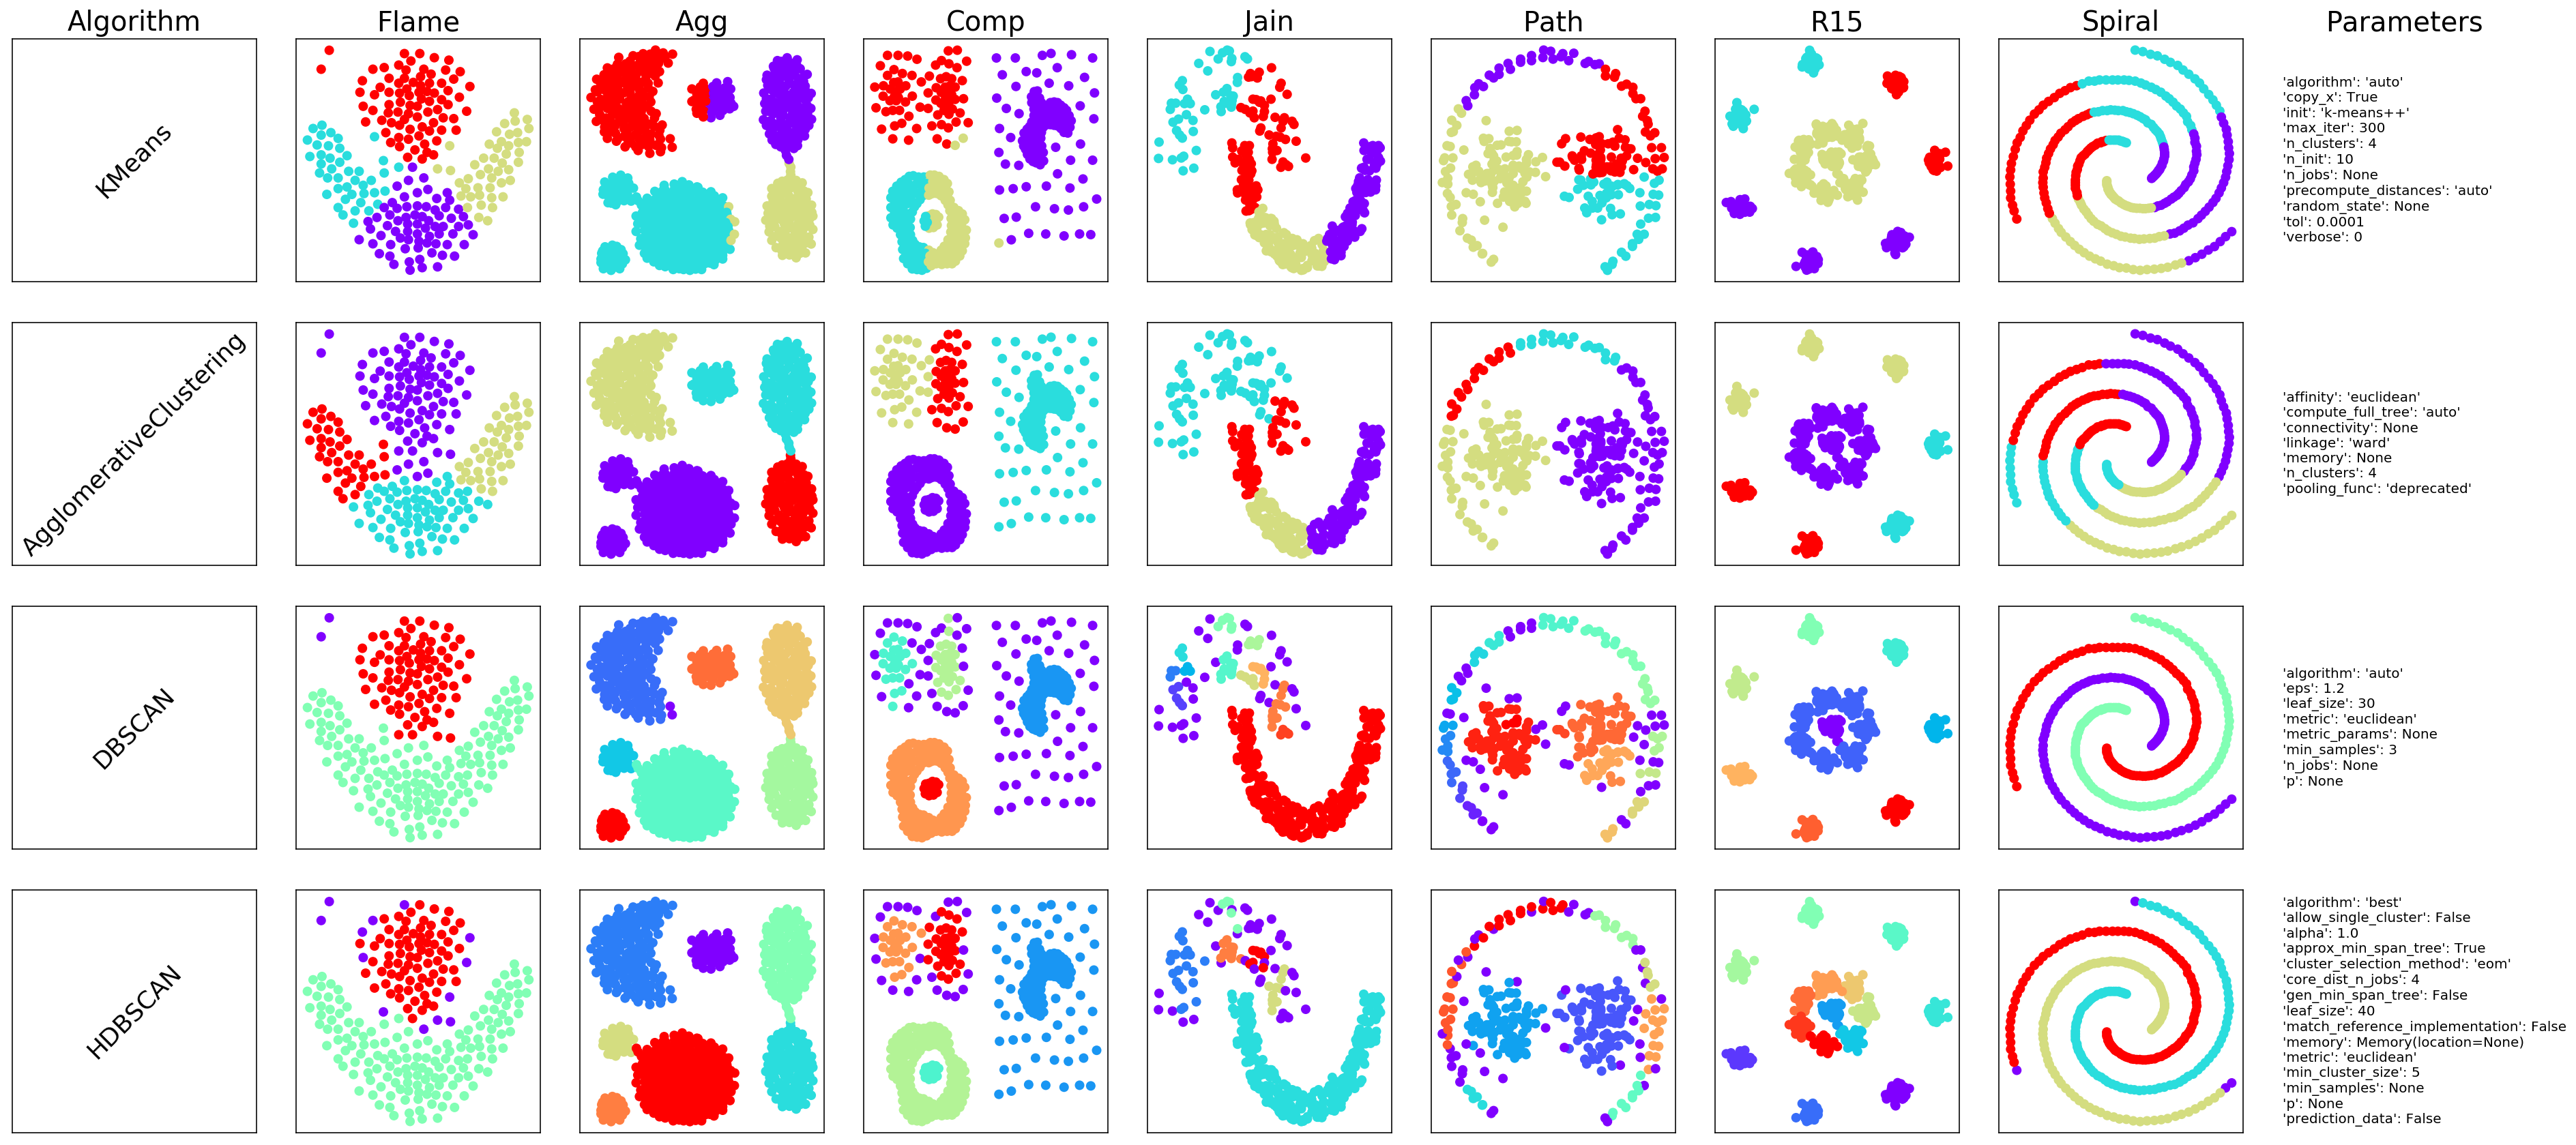

In [6]:
# The fist argument of the getplots function is a list of clustering models
# The function will make one row of plots for each model in that list

getplots([KMeans(n_clusters=4),
          AgglomerativeClustering(n_clusters=4),
          DBSCAN(eps=1.2, min_samples=3), # After a little tuning this works really well
          HDBSCAN()],  # With no tunning this works really well
         
         dsets=datasets,
         dset_names=dataset_names)